## Support Vector Machines
+ 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
+ 서포트 벡터 : 클래스 사이의 경계에 위치한 데이터 포인트
+ 각 서포트 벡터가 클래스 사이의 결정 경계를 구분하는 데 얼마나 중요한지를 학습하는 방법이다.  
    => 마진(각 서포트 벡터 사이의 거리)이 가장 큰 방향으로 학습  
    => 서포트 벡터까지의 거리와 서포트 벡터의 중요도를 기반으로 예측

In [61]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [62]:
from sklearn.svm import SVR, SVC  #support vector regressor/classifier
from sklearn.datasets import load_boston, load_diabetes  #회귀
from sklearn.datasets import load_breast_cancer, load_iris, load_wine  #분류
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE  #시각화 목적

## SVM을 이용한 회귀모델(SVR)

In [63]:
X, y = load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = SVR()

model.fit(X_train, y_train)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

학습데이터 점수 : 0.17964669464989047
평가데이터 점수 : 0.2749755336369746


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        tar

In [64]:
X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = SVR()

model.fit(X_train, y_train)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

학습데이터 점수 : 0.1864286814438485
평가데이터 점수 : 0.08868974173233501


## SVM을 이용한 분류 모델(SVC)

In [65]:
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = SVC()

model.fit(X_train, y_train)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

학습데이터 점수 : 0.9252747252747253
평가데이터 점수 : 0.9035087719298246


In [66]:
X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = SVC()

model.fit(X_train, y_train)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

학습데이터 점수 : 0.975
평가데이터 점수 : 0.9666666666666667


In [67]:
X, y = load_wine(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = SVC()

model.fit(X_train, y_train)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

학습데이터 점수 : 0.676056338028169
평가데이터 점수 : 0.6944444444444444


## 커널 기법
+ 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
+ scikit-learn에서는 Linear, Polynominal, RBF(Radial Basis Function) 등 다양한 커널 기법을 지원

In [109]:
X, y = load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

polynominal_svr = SVR(kernel='poly')
polynominal_svr.fit(X_train, y_train)

rbf = SVR(kernel='rbf')
rbf.fit(X_train, y_train)

sigmoid = SVR(kernel='sigmoid')
sigmoid.fit(X_train, y_train)

print('kernel에 따른 성능 비교\n----------------------------------------------')
print(f'linear 학습데이터 점수 : {linear_svr.score(X_train, y_train)}')
print(f'linear 평가데이터 점수 : {linear_svr.score(X_test, y_test)}\n')
print(f'poly   학습데이터 점수 : {polynominal_svr.score(X_train, y_train)}')
print(f'poly   평가데이터 점수 : {polynominal_svr.score(X_test, y_test)}\n')
print(f'rbf    학습데이터 점수 : {rbf.score(X_train, y_train)}')
print(f'rbf    평가데이터 점수 : {rbf.score(X_test, y_test)}\n')
print(f'sigmoid학습데이터 점수 : {sigmoid.score(X_train, y_train)}')
print(f'sigmoid평가데이터 점수 : {sigmoid.score(X_test, y_test)}')

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        tar

kernel에 따른 성능 비교
----------------------------------------------
linear 학습데이터 점수 : 0.6886583914240834
linear 평가데이터 점수 : 0.772543063533414

poly   학습데이터 점수 : 0.17799007580884785
poly   평가데이터 점수 : 0.26461703121265145

rbf    학습데이터 점수 : 0.17964669464989047
rbf    평가데이터 점수 : 0.2749755336369746

sigmoid학습데이터 점수 : 0.07641858597365148
sigmoid평가데이터 점수 : 0.02969338534473487


In [152]:
X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

polynominal_svr = SVR(kernel='poly')
polynominal_svr.fit(X_train, y_train)

rbf = SVR(kernel='rbf')
rbf.fit(X_train, y_train)

sigmoid = SVR(kernel='sigmoid')
sigmoid.fit(X_train, y_train)

print('kernel에 따른 성능 비교\n----------------------------------------------')
print(f'linear 학습데이터 점수 : {linear_svr.score(X_train, y_train)}')
print(f'linear 평가데이터 점수 : {linear_svr.score(X_test, y_test)}\n')
print(f'poly   학습데이터 점수 : {polynominal_svr.score(X_train, y_train)}')
print(f'poly   평가데이터 점수 : {polynominal_svr.score(X_test, y_test)}\n')
print(f'rbf    학습데이터 점수 : {rbf.score(X_train, y_train)}')
print(f'rbf    평가데이터 점수 : {rbf.score(X_test, y_test)}\n')
print(f'sigmoid학습데이터 점수 : {sigmoid.score(X_train, y_train)}')
print(f'sigmoid평가데이터 점수 : {sigmoid.score(X_test, y_test)}')

kernel에 따른 성능 비교
----------------------------------------------
linear 학습데이터 점수 : 0.0004883271543026924
linear 평가데이터 점수 : -0.04879771974546876

poly   학습데이터 점수 : 0.2733365589318849
poly   평가데이터 점수 : 0.26144846199662486

rbf    학습데이터 점수 : 0.1864286814438485
rbf    평가데이터 점수 : 0.08868974173233501

sigmoid학습데이터 점수 : 0.37607170350597063
sigmoid평가데이터 점수 : 0.326286850958199


In [153]:
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

polynominal_svr = SVC(kernel='poly')
polynominal_svr.fit(X_train, y_train)

rbf = SVC(kernel='rbf')
rbf.fit(X_train, y_train)

sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)

print('kernel에 따른 성능 비교\n----------------------------------------------')
print(f'linear 학습데이터 점수 : {linear_svc.score(X_train, y_train)}')
print(f'linear 평가데이터 점수 : {linear_svc.score(X_test, y_test)}\n')
print(f'poly   학습데이터 점수 : {polynominal_svr.score(X_train, y_train)}')
print(f'poly   평가데이터 점수 : {polynominal_svr.score(X_test, y_test)}\n')
print(f'rbf    학습데이터 점수 : {rbf.score(X_train, y_train)}')
print(f'rbf    평가데이터 점수 : {rbf.score(X_test, y_test)}\n')
print(f'sigmoid학습데이터 점수 : {sigmoid.score(X_train, y_train)}')
print(f'sigmoid평가데이터 점수 : {sigmoid.score(X_test, y_test)}')

kernel에 따른 성능 비교
----------------------------------------------
linear 학습데이터 점수 : 0.9692307692307692
linear 평가데이터 점수 : 0.9473684210526315

poly   학습데이터 점수 : 0.9186813186813186
poly   평가데이터 점수 : 0.8947368421052632

rbf    학습데이터 점수 : 0.9252747252747253
rbf    평가데이터 점수 : 0.9035087719298246

sigmoid학습데이터 점수 : 0.46593406593406594
sigmoid평가데이터 점수 : 0.5


In [154]:
X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

polynominal_svr = SVC(kernel='poly')
polynominal_svr.fit(X_train, y_train)

rbf = SVC(kernel='rbf')
rbf.fit(X_train, y_train)

sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)

print('kernel에 따른 성능 비교\n----------------------------------------------')
print(f'linear 학습데이터 점수 : {linear_svc.score(X_train, y_train)}')
print(f'linear 평가데이터 점수 : {linear_svc.score(X_test, y_test)}\n')
print(f'poly   학습데이터 점수 : {polynominal_svr.score(X_train, y_train)}')
print(f'poly   평가데이터 점수 : {polynominal_svr.score(X_test, y_test)}\n')
print(f'rbf    학습데이터 점수 : {rbf.score(X_train, y_train)}')
print(f'rbf    평가데이터 점수 : {rbf.score(X_test, y_test)}\n')
print(f'sigmoid학습데이터 점수 : {sigmoid.score(X_train, y_train)}')
print(f'sigmoid평가데이터 점수 : {sigmoid.score(X_test, y_test)}')

kernel에 따른 성능 비교
----------------------------------------------
linear 학습데이터 점수 : 0.9916666666666667
linear 평가데이터 점수 : 1.0

poly   학습데이터 점수 : 0.975
poly   평가데이터 점수 : 0.9666666666666667

rbf    학습데이터 점수 : 0.975
rbf    평가데이터 점수 : 0.9666666666666667

sigmoid학습데이터 점수 : 0.19166666666666668
sigmoid평가데이터 점수 : 0.16666666666666666


In [161]:
X, y = load_wine(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

polynominal_svr = SVC(kernel='poly')
polynominal_svr.fit(X_train, y_train)

rbf = SVC(kernel='rbf')
rbf.fit(X_train, y_train)

sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)

print('MinMaxScaler로 정규화 후 kernel에 따른 성능 비교\n----------------------------------------------')
print(f'linear 학습데이터 점수 : {linear_svc.score(X_train, y_train)}')
print(f'linear 평가데이터 점수 : {linear_svc.score(X_test, y_test)}\n')
print(f'poly   학습데이터 점수 : {polynominal_svr.score(X_train, y_train)}')
print(f'poly   평가데이터 점수 : {polynominal_svr.score(X_test, y_test)}\n')
print(f'rbf    학습데이터 점수 : {rbf.score(X_train, y_train)}')
print(f'rbf    평가데이터 점수 : {rbf.score(X_test, y_test)}\n')
print(f'sigmoid학습데이터 점수 : {sigmoid.score(X_train, y_train)}')
print(f'sigmoid평가데이터 점수 : {sigmoid.score(X_test, y_test)}')

MinMaxScaler로 정규화 후 kernel에 따른 성능 비교
----------------------------------------------
linear 학습데이터 점수 : 0.9929577464788732
linear 평가데이터 점수 : 0.9722222222222222

poly   학습데이터 점수 : 1.0
poly   평가데이터 점수 : 0.9722222222222222

rbf    학습데이터 점수 : 0.9929577464788732
rbf    평가데이터 점수 : 0.9722222222222222

sigmoid학습데이터 점수 : 0.4225352112676056
sigmoid평가데이터 점수 : 0.25


## 매개변수 튜닝
+ SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능  
    => 매개변수를 변경하면서 성능 변화를 관찰

In [73]:
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

polynominal_svc_1 = SVC(kernel='poly')
polynominal_svc_1.fit(X_train, y_train)
polynominal_svc_2 = SVC(kernel='poly', degree=2, C=0.1, gamma='auto')
polynominal_svc_2.fit(X_train, y_train)
polynominal_svc_3 = SVC(kernel='poly', degree=2, C=2.0, gamma='scale')
polynominal_svc_3.fit(X_train, y_train)

print(f'학습데이터 점수 : {polynominal_svc_1.score(X_train, y_train)}')
print(f'평가데이터 점수 : {polynominal_svc_1.score(X_test, y_test)}\n')
print(f'학습데이터 점수 : {polynominal_svc_2.score(X_train, y_train)}')
print(f'평가데이터 점수 : {polynominal_svc_2.score(X_test, y_test)}\n')
print(f'학습데이터 점수 : {polynominal_svc_3.score(X_train, y_train)}')
print(f'평가데이터 점수 : {polynominal_svc_3.score(X_test, y_test)}')

학습데이터 점수 : 0.9186813186813186
평가데이터 점수 : 0.8947368421052632

학습데이터 점수 : 0.9714285714285714
평가데이터 점수 : 0.9649122807017544

학습데이터 점수 : 0.9252747252747253
평가데이터 점수 : 0.9035087719298246


In [74]:
rbf_1 = SVC(kernel='rbf')
rbf_1.fit(X_train, y_train)
rbf_2 = SVC(kernel='rbf', degree=2, C=0.1, gamma='auto')
rbf_2.fit(X_train, y_train)
rbf_3 = SVC(kernel='rbf', degree=2, C=2.0, gamma='scale')
rbf_3.fit(X_train, y_train)

print(f'학습데이터 점수 : {rbf_1.score(X_train, y_train)}')
print(f'평가데이터 점수 : {rbf_1.score(X_test, y_test)}\n')
print(f'학습데이터 점수 : {rbf_2.score(X_train, y_train)}')
print(f'평가데이터 점수 : {rbf_2.score(X_test, y_test)}\n')
print(f'학습데이터 점수 : {rbf_3.score(X_train, y_train)}')
print(f'평가데이터 점수 : {rbf_3.score(X_test, y_test)}')

학습데이터 점수 : 0.9252747252747253
평가데이터 점수 : 0.9035087719298246

학습데이터 점수 : 0.6329670329670329
평가데이터 점수 : 0.6052631578947368

학습데이터 점수 : 0.9252747252747253
평가데이터 점수 : 0.9035087719298246


## Preprocessing
+ SVM은 입력데이터가 정규화되어야 좋은 성능을 보임
+ 주로 모든 특성 값을 0~1 범위로 맞추는 방법을 사용  
    => scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [115]:
X, y = load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

polynominal_svr = SVR(kernel='poly')
polynominal_svr.fit(X_train, y_train)

rbf = SVR(kernel='rbf')
rbf.fit(X_train, y_train)

sigmoid = SVR(kernel='sigmoid')
sigmoid.fit(X_train, y_train)

print('StandardScaler로 정규화 후 kernel에 따른 성능 비교\n------------------------------------------------')
print(f'linear 학습데이터 점수 : {linear_svr.score(X_train, y_train)}')
print(f'linear 평가데이터 점수 : {linear_svr.score(X_test, y_test)}\n')
print(f'poly   학습데이터 점수 : {polynominal_svr.score(X_train, y_train)}')
print(f'poly   평가데이터 점수 : {polynominal_svr.score(X_test, y_test)}\n')
print(f'rbf    학습데이터 점수 : {rbf.score(X_train, y_train)}')
print(f'rbf    평가데이터 점수 : {rbf.score(X_test, y_test)}\n')
print(f'sigmoid학습데이터 점수 : {sigmoid.score(X_train, y_train)}')
print(f'sigmoid평가데이터 점수 : {sigmoid.score(X_test, y_test)}')

StandardScaler로 정규화 후 kernel에 따른 성능 비교
------------------------------------------------
linear 학습데이터 점수 : 0.6890283405495305
linear 평가데이터 점수 : 0.7802786321372277

poly   학습데이터 점수 : 0.673900723332318
poly   평가데이터 점수 : 0.731344688834457

rbf    학습데이터 점수 : 0.6457713868658361
rbf    평가데이터 점수 : 0.7577721268821178

sigmoid학습데이터 점수 : 0.5519171249361043
sigmoid평가데이터 점수 : 0.6475692469536805


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        tar

In [116]:
X, y = load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

polynominal_svr = SVR(kernel='poly')
polynominal_svr.fit(X_train, y_train)

rbf = SVR(kernel='rbf')
rbf.fit(X_train, y_train)

sigmoid = SVR(kernel='sigmoid')
sigmoid.fit(X_train, y_train)

print('MinMaxScaler로 정규화 후 kernel에 따른 성능 비교\n------------------------------------------------')
print(f'linear 학습데이터 점수 : {linear_svr.score(X_train, y_train)}')
print(f'linear 평가데이터 점수 : {linear_svr.score(X_test, y_test)}\n')
print(f'poly   학습데이터 점수 : {polynominal_svr.score(X_train, y_train)}')
print(f'poly   평가데이터 점수 : {polynominal_svr.score(X_test, y_test)}\n')
print(f'rbf    학습데이터 점수 : {rbf.score(X_train, y_train)}')
print(f'rbf    평가데이터 점수 : {rbf.score(X_test, y_test)}\n')
print(f'sigmoid학습데이터 점수 : {sigmoid.score(X_train, y_train)}')
print(f'sigmoid평가데이터 점수 : {sigmoid.score(X_test, y_test)}')
#poly일 때는 StandardScaler일 때보다 더 성능이 좋아짐

MinMaxScaler로 정규화 후 kernel에 따른 성능 비교
------------------------------------------------
linear 학습데이터 점수 : 0.5979847434533032
linear 평가데이터 점수 : 0.6986629143689612

poly   학습데이터 점수 : 0.8014812010144969
poly   평가데이터 점수 : 0.8459779052053498

rbf    학습데이터 점수 : 0.5795255560415795
rbf    평가데이터 점수 : 0.6926026641432541

sigmoid학습데이터 점수 : 0.18552304823578858
sigmoid평가데이터 점수 : 0.18314653273666603


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        tar

In [147]:
X, y = load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

polynominal_svr = SVR(kernel='poly') 
poly_2 = SVR(kernel='poly', degree=2, C=0.1, gamma='auto')
poly_3 = SVR(kernel='poly', degree=2, C=0.01, gamma='auto')
poly_4 = SVR(kernel='poly', degree=2, C=1., gamma='auto')
poly_5 = SVR(kernel='poly', degree=2, C=0.1, gamma='scale')
poly_6 = SVR(kernel='poly', degree=2, C=0.01, gamma='scale')
poly_7 = SVR(kernel='poly', degree=2, C=1., gamma='scale')
best = SVR(C= 0.1, degree=1, epsilon=1, gamma='scale', kernel='linear')

polynominal_svr.fit(X_train, y_train)
poly_2.fit(X_train, y_train)
poly_3.fit(X_train, y_train)
poly_4.fit(X_train, y_train)
poly_5.fit(X_train, y_train)
poly_6.fit(X_train, y_train)
poly_7.fit(X_train, y_train)
best.fit(X_train, y_train)

print('kernel의 매개변수에 따른 성능 비교\n------------------------------------------------')
print(f'poly   학습데이터 점수 : {polynominal_svr.score(X_train, y_train)}')
print(f'poly   평가데이터 점수 : {polynominal_svr.score(X_test, y_test)}\n')
print(f'poly2  학습데이터 점수 : {poly_2.score(X_train, y_train)}')
print(f'poly2  평가데이터 점수 : {poly_2.score(X_test, y_test)}\n')
print(f'poly3  학습데이터 점수 : {poly_3.score(X_train, y_train)}')
print(f'poly3  평가데이터 점수 : {poly_3.score(X_test, y_test)}\n')
print(f'poly4  학습데이터 점수 : {poly_4.score(X_train, y_train)}')
print(f'poly4  평가데이터 점수 : {poly_4.score(X_test, y_test)}\n')
print(f'poly5  학습데이터 점수 : {poly_5.score(X_train, y_train)}')
print(f'poly5  평가데이터 점수 : {poly_5.score(X_test, y_test)}\n')
print(f'poly6  학습데이터 점수 : {poly_6.score(X_train, y_train)}')
print(f'poly6  평가데이터 점수 : {poly_6.score(X_test, y_test)}\n')
print(f'poly7  학습데이터 점수 : {poly_7.score(X_train, y_train)}')
print(f'poly7  평가데이터 점수 : {poly_7.score(X_test, y_test)}\n')
print(f'best   학습데이터 점수 : {best.score(X_train, y_train)}')
print(f'best   평가데이터 점수 : {best.score(X_test, y_test)}')

kernel의 매개변수에 따른 성능 비교
------------------------------------------------
poly   학습데이터 점수 : 0.8014812010144969
poly   평가데이터 점수 : 0.8459779052053498

poly2  학습데이터 점수 : 0.0179682224578821
poly2  평가데이터 점수 : 0.015300383826670982

poly3  학습데이터 점수 : -0.01722695372496097
poly3  평가데이터 점수 : -0.03298521670274712

poly4  학습데이터 점수 : 0.19374341233351955
poly4  평가데이터 점수 : 0.25509968462259136

poly5  학습데이터 점수 : 0.40896858384326584
poly5  평가데이터 점수 : 0.4878451190945077

poly6  학습데이터 점수 : 0.16494120240068355
poly6  평가데이터 점수 : 0.21727162380861087

poly7  학습데이터 점수 : 0.6930218287793882
poly7  평가데이터 점수 : 0.7721104118439928

best   학습데이터 점수 : 0.30715041484525496
best   평가데이터 점수 : 0.3957674263569301


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        tar

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


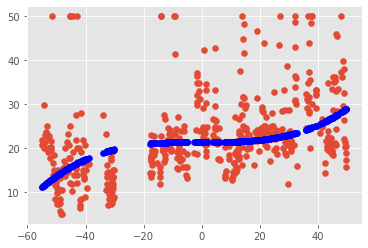

In [140]:
X_comp = TSNE(n_components=1).fit_transform(X)

polynominal_svr.fit(X_comp, y)

y_pred = polynominal_svr.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, y_pred, color='b');

In [149]:
estimator = make_pipeline(StandardScaler(),
                          SVR(kernel='linear'))

cross_validate(estimator=estimator,
               X=X, y=y,
               cv=10,
               n_jobs=multiprocessing.cpu_count(),
               verbose=True)

pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma':[None, 'scale', 'auto'],
               'model__C':[None, 0.01, 0.1, 1],
               'model__epsilon':[None, 0.01, 0.1, 1],
               'model__kernel':['linear', 'poly', 'rbf', 'sigmoid'],
               'model__degree':[None, 1, 2, 3, 4, 5]}]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  n_jobs=multiprocessing.cpu_count(),
                  cv=10,
                  verbose=True,
                  refit=True)

gs.fit(X, y)

print(f'best estimator : {gs.best_estimator_}')
print(f'best score : {gs.best_score_}')
print(f'best params : {gs.best_params_}')

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  10 | elapsed:    0.0s finished


Fitting 10 folds for each of 1152 candidates, totalling 11520 fits
best estimator : Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, degree=1, epsilon=1, kernel='linear'))])
best score : 0.3806728327128428
best params : {'model__C': 0.1, 'model__degree': 1, 'model__epsilon': 1, 'model__gamma': 'scale', 'model__kernel': 'linear'}


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
7920 fits failed out of a total of 11520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1920 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local

In [134]:
result = pd.DataFrame(gs.cv_results_)
result.loc[:, ['params', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score').head()

,params,mean_test_score,rank_test_score
40,"{'model__C': 0.1, 'model__epsilon': 1, 'model_...",0.380673,1
44,"{'model__C': 0.1, 'model__epsilon': 1, 'model_...",0.380673,1
32,"{'model__C': 0.1, 'model__epsilon': 0.1, 'mode...",0.349922,3
36,"{'model__C': 0.1, 'model__epsilon': 0.1, 'mode...",0.349922,3
28,"{'model__C': 0.1, 'model__epsilon': 0.01, 'mod...",0.343132,5


In [80]:
X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)
polynominal_svr = SVR(kernel='poly')
polynominal_svr.fit(X_train, y_train)
rbf = SVR(kernel='rbf')
rbf.fit(X_train, y_train)

print(f'학습데이터 점수 : {linear_svr.score(X_train, y_train)}')
print(f'평가데이터 점수 : {linear_svr.score(X_test, y_test)}\n')
print(f'학습데이터 점수 : {polynominal_svr.score(X_train, y_train)}')
print(f'평가데이터 점수 : {polynominal_svr.score(X_test, y_test)}\n')
print(f'학습데이터 점수 : {rbf.score(X_train, y_train)}')
print(f'평가데이터 점수 : {rbf.score(X_test, y_test)}')

학습데이터 점수 : 0.5182303904136566
평가데이터 점수 : 0.44147492547498335

학습데이터 점수 : 0.27349273198529855
평가데이터 점수 : 0.2653560978169849

학습데이터 점수 : 0.18641163610180778
평가데이터 점수 : 0.08836597213991104


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


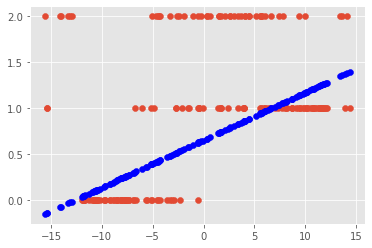

In [84]:
X_comp = TSNE(n_components=1).fit_transform(X)

linear_svr.fit(X_comp, y)

y_pred = linear_svr.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, y_pred, color='b');

In [135]:
estimator = make_pipeline(StandardScaler(),
                          SVR(kernel='linear'))

cross_validate(estimator=estimator,
               X=X, y=y,
               cv=10,
               n_jobs=multiprocessing.cpu_count(),
               verbose=True)

pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma':['scale', 'auto'],
               'model__C':[0.01, 0.1, 1],
               'model__epsilon':[0.01, 0.1, 1]}]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  n_jobs=multiprocessing.cpu_count(),
                  cv=10,
                  verbose=True)

gs.fit(X, y)

print(f'best estimator : {gs.best_estimator_}')
print(f'best score : {gs.best_score_}')
print(f'best params : {gs.best_params_}')

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  10 | elapsed:    0.0s finished


Fitting 10 folds for each of 18 candidates, totalling 180 fits
best estimator : Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=1, kernel='linear'))])
best score : 0.3806728327128428
best params : {'model__C': 0.1, 'model__epsilon': 1, 'model__gamma': 'scale'}


In [ ]:
X, y = load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)
polynominal_svr = SVR(kernel='poly')
polynominal_svr.fit(X_train, y_train)
rbf = SVR(kernel='rbf')
rbf.fit(X_train, y_train)

print(f'학습데이터 점수 : {linear_svr.score(X_train, y_train)}')
print(f'평가데이터 점수 : {linear_svr.score(X_test, y_test)}\n')
print(f'학습데이터 점수 : {polynominal_svr.score(X_train, y_train)}')
print(f'평가데이터 점수 : {polynominal_svr.score(X_test, y_test)}\n')
print(f'학습데이터 점수 : {rbf.score(X_train, y_train)}')
print(f'평가데이터 점수 : {rbf.score(X_test, y_test)}')

학습데이터 점수 : 0.6890283405495305
평가데이터 점수 : 0.7802786321372277

학습데이터 점수 : 0.673900723332318
평가데이터 점수 : 0.731344688834457

학습데이터 점수 : 0.6457713868658361
평가데이터 점수 : 0.7577721268821178


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        tar

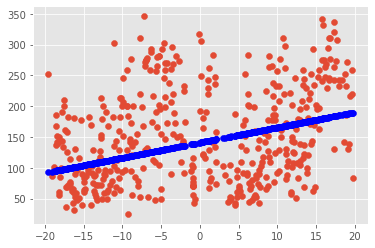

In [ ]:
linear_svr.fit(X_comp, y)

y_pred = linear_svr.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, y_pred, color='b');

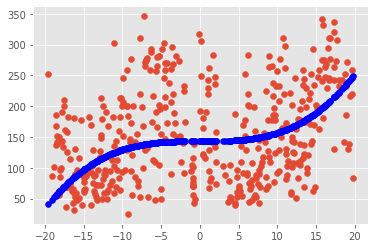

In [ ]:
polynominal_svr.fit(X_comp, y)

y_pred = polynominal_svr.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, y_pred, color='b');

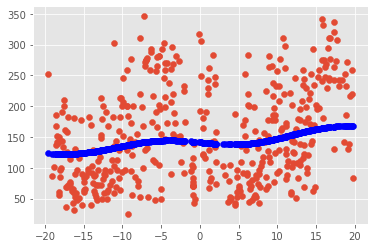

In [ ]:
rbf.fit(X_comp, y)

y_pred = rbf.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, y_pred, color='b');

In [82]:
estimator = make_pipeline(StandardScaler(),
                          SVR(kernel='linear'))

cross_validate(estimator=estimator,
               X=X, y=y,
               cv=10,
               n_jobs=multiprocessing.cpu_count(),
               verbose=True)

pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma':['scale', 'auto'],
               'model__C':[0.01, 0.1, 1],
               'model__epsilon':[0.01, 0.1, 1],
               'model__kernel':['linear', 'rbf', 'poly', 'sigmoid']}]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  n_jobs=multiprocessing.cpu_count(),
                  cv=10,
                  verbose=True)

gs.fit(X, y)

print(f'best estimator : {gs.best_estimator_}')
print(f'best score : {gs.best_score_}')
print(f'best params : {gs.best_params_}')

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  10 | elapsed:    0.0s finished


Fitting 10 folds for each of 72 candidates, totalling 720 fits
best estimator : Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=1, kernel='linear'))])
best score : 0.464554680689368
best params : {'model__C': 1, 'model__epsilon': 0.1, 'model__gamma': 'scale', 'model__kernel': 'linear'}


In [162]:
X, y = load_wine(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(kernel='rbf')
model.fit(X_train, y_train)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

학습데이터 점수 : 0.9929577464788732
평가데이터 점수 : 0.9444444444444444


In [166]:
estimator = make_pipeline(StandardScaler(),
                          SVC(kernel='rbf'))

cross_validate(estimator=estimator,
               X=X, y=y,
               cv=10,
               n_jobs=multiprocessing.cpu_count(),
               verbose=True)

pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='rbf'))])

param_grid = [{'model__gamma':['scale', 'auto'],
               'model__C':[0.01, 0.1, 1],
               'model__kernel':['linear', 'rbf', 'poly', 'sigmoid']}]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  n_jobs=multiprocessing.cpu_count(),
                  cv=10,
                  verbose=True,
                  refit=True)

gs.fit(X, y)

print(f'best estimator : {gs.best_estimator_}')
print(f'best score : {gs.best_score_}')
print(f'best params : {gs.best_params_}')

Fitting 10 folds for each of 24 candidates, totalling 240 fits
best estimator : Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.01, kernel='linear'))])
best score : 0.9777777777777779
best params : {'model__C': 0.01, 'model__gamma': 'scale', 'model__kernel': 'linear'}


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  10 | elapsed:    0.0s finished


In [167]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

In [172]:
X.shape, X_comp.shape

((178, 13), (178, 2))

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


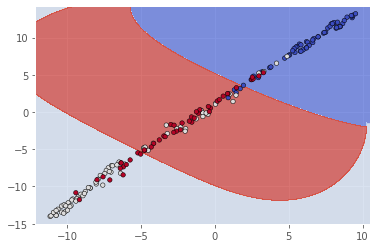

In [171]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

model.fit(X_comp, y)

y_pred = model.predict(X_comp)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7,)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [100]:
estimator = make_pipeline(StandardScaler(),
                          SVC(kernel='linear'))

cross_validate(estimator=estimator,
               X=X, y=y,
               cv=10,
               n_jobs=multiprocessing.cpu_count(),
               verbose=True)

pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma':['scale', 'auto'],
               'model__C':[0.01, 0.1, 1]}]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  n_jobs=multiprocessing.cpu_count(),
                  cv=10,
                  verbose=True)

gs.fit(X, y)

print(f'best estimator : {gs.best_estimator_}')
print(f'best score : {gs.best_score_}')
print(f'best params : {gs.best_params_}')

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  10 | elapsed:    1.6s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits
best estimator : Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.01, kernel='linear'))])
best score : 0.9777777777777779
best params : {'model__C': 0.01, 'model__gamma': 'scale'}
